## Assignment

In this assignment, you'll be working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above. 

Access this data from the Thinkful database using the following credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Determine all the variable types and find the fraction of the missing values for each variable.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using *only* the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

Submit your work below, and plan on discussing with your mentor. You can also take a look at this [example solution](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_missing_values/solution.ipynb).

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
# import warnings

# warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [89]:
#df = pd.read_csv('states_all.csv')

In [90]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [61]:
#df.isnull()

In [62]:
#for column_name in df.columns:
    #print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))

In [63]:
df.isnull().sum()/df.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

Question 2: Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

Since each mising value is a continuous integer, it can be replaced by its average value (of the corresponding states).

In [91]:
df2 = df.copy()

#df["ENROLL"].fillna(df["ENROLL"].mean(), inplace=True)

#df2 = df.apply(lambda x: x.fillna(x.mean()))

cols = ["ENROLL", 
        "TOTAL_REVENUE", 
        "FEDERAL_REVENUE", 
        "STATE_REVENUE", 
        "LOCAL_REVENUE", 
        "TOTAL_EXPENDITURE", 
        "INSTRUCTION_EXPENDITURE", 
        "SUPPORT_SERVICES_EXPENDITURE",
        "OTHER_EXPENDITURE", 
        "CAPITAL_OUTLAY_EXPENDITURE", 
        "GRADES_PK_G", 
        "GRADES_KG_G", 
        "GRADES_4_G", 
        "GRADES_8_G", 
        "GRADES_12_G", 
        "GRADES_1_8_G", 
        "GRADES_9_12_G", 
        "GRADES_ALL_G"]

#for x in cols:
    #df2[x].fillna(df2[x].mean(), inplace=True)

# EXAMPLE SOLUTION
for col in cols:
    df2.loc[:, col] = df2.loc[:, col].fillna(df2.loc[:, col].mean())
    
#df2.GRADES_PK_G[51]

In [79]:
df2.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,915930.820993,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


The example solution given fills in missing averages with the average of the entire column. Shouldn't it get the average per state?

Question 3: Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [80]:
df3 = df.copy()

def yearmean(year, col):
    tmp = df3[df3["YEAR"] == year]
    mean = tmp[col].mean
    return mean

years1 = df3["YEAR"].unique()

years2 = list(range(1992, 2017))

#print(years1)
#print(years2)

#type(years1)
#type(years2)

#for x in cols:
    #df3[x].fillna(yearmean(), inplace=True)
    
#for col in cols:
    #for year in years1:
        #df3[col].fillna(yearmean(year, col))
        
#for col in cols:
    #for year in years1:
        #df3.loc[df3["YEAR"] == year, col] = df3.loc[df3["YEAR"] == year, col].fillna(df3[df3["YEAR"] == year][col].mean())
        
for col in cols:
    for year in years1:
        df3.loc[df3["YEAR"] == year, col] = df3.loc[df3["YEAR"] == year, col].fillna(
            df3[df3["YEAR"] == year][col].mean())
        
#df3.GRADES_PK_G[51]

Question 4: This time, fill in the missing values using interpolation (extrapolation).

In [81]:
df4 = df.copy()

#for col in cols:
    #for i in range(0, len(df4[col])):
        #if pd.isnull(df4[col][i]):
            #df4[col][i] = df4[col][i-1]

#for col in cols:
    #df4[col].interpolate()
            
for col in cols:
    df4.loc[:, col] = df4.loc[:, col].interpolate()
    
#df4.GRADES_PK_G[51]

Question 5: Compare your results for the second, third and the fourth questions. Do you find any meaningful differences?

Yes, the median fluctuates depending on which method was used. It seems that the year-by-year replacement method produced results most similar to the original data. The first method of replacing values with the overall mean of the column produced a consistently inflated median, suggesting that this is likely not the best method to use here. Interpolation yielded an inflated median for the revenue and expenditure columns, but a decreased median for the grade count columns, suggesting there were more missing entries in areas of the data with lower grade values.

In [116]:
#df.median().plot(kind='bar', figsize=(15,5))

In [117]:
#df2.median().plot(kind='bar', figsize=(15,5))

In [118]:
#df3.median().plot(kind='bar', figsize=(15,5))

In [119]:
#df4.median().plot(kind='bar', figsize=(15,5))

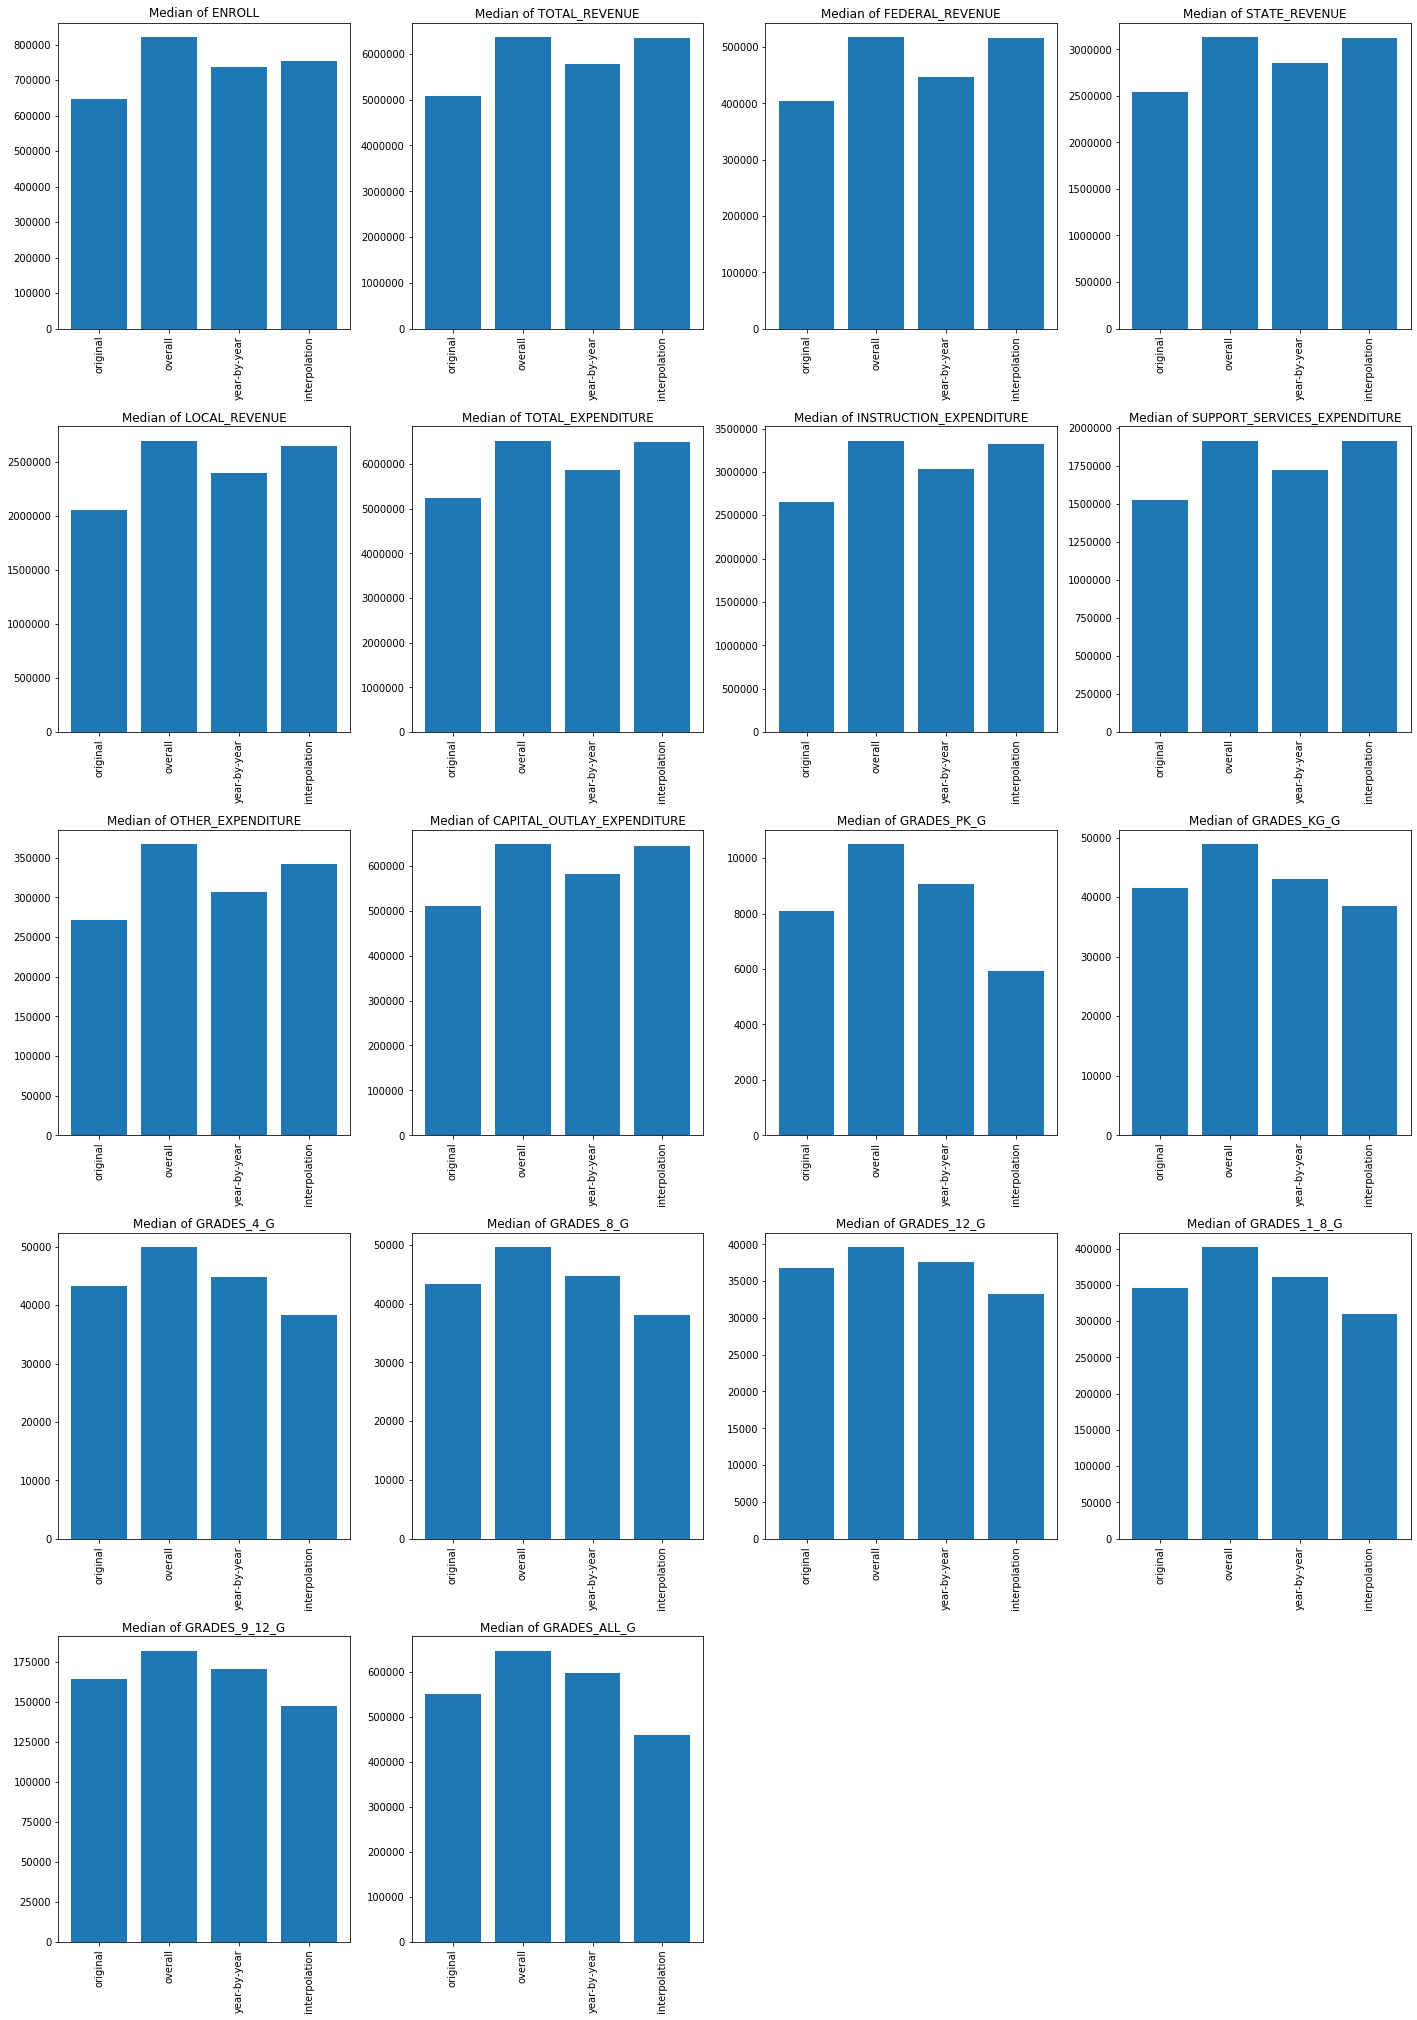

In [96]:
# from solution
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(cols):
    df5 = pd.concat([df[col], df2[col],
                     df3[col], df4[col]], axis=1)
    
    plt.subplot(len(cols), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df5.median())
    plt.xticks(rotation='vertical')
    plt.title("Median of {}".format(col))
    
plt.tight_layout()
plt.show()

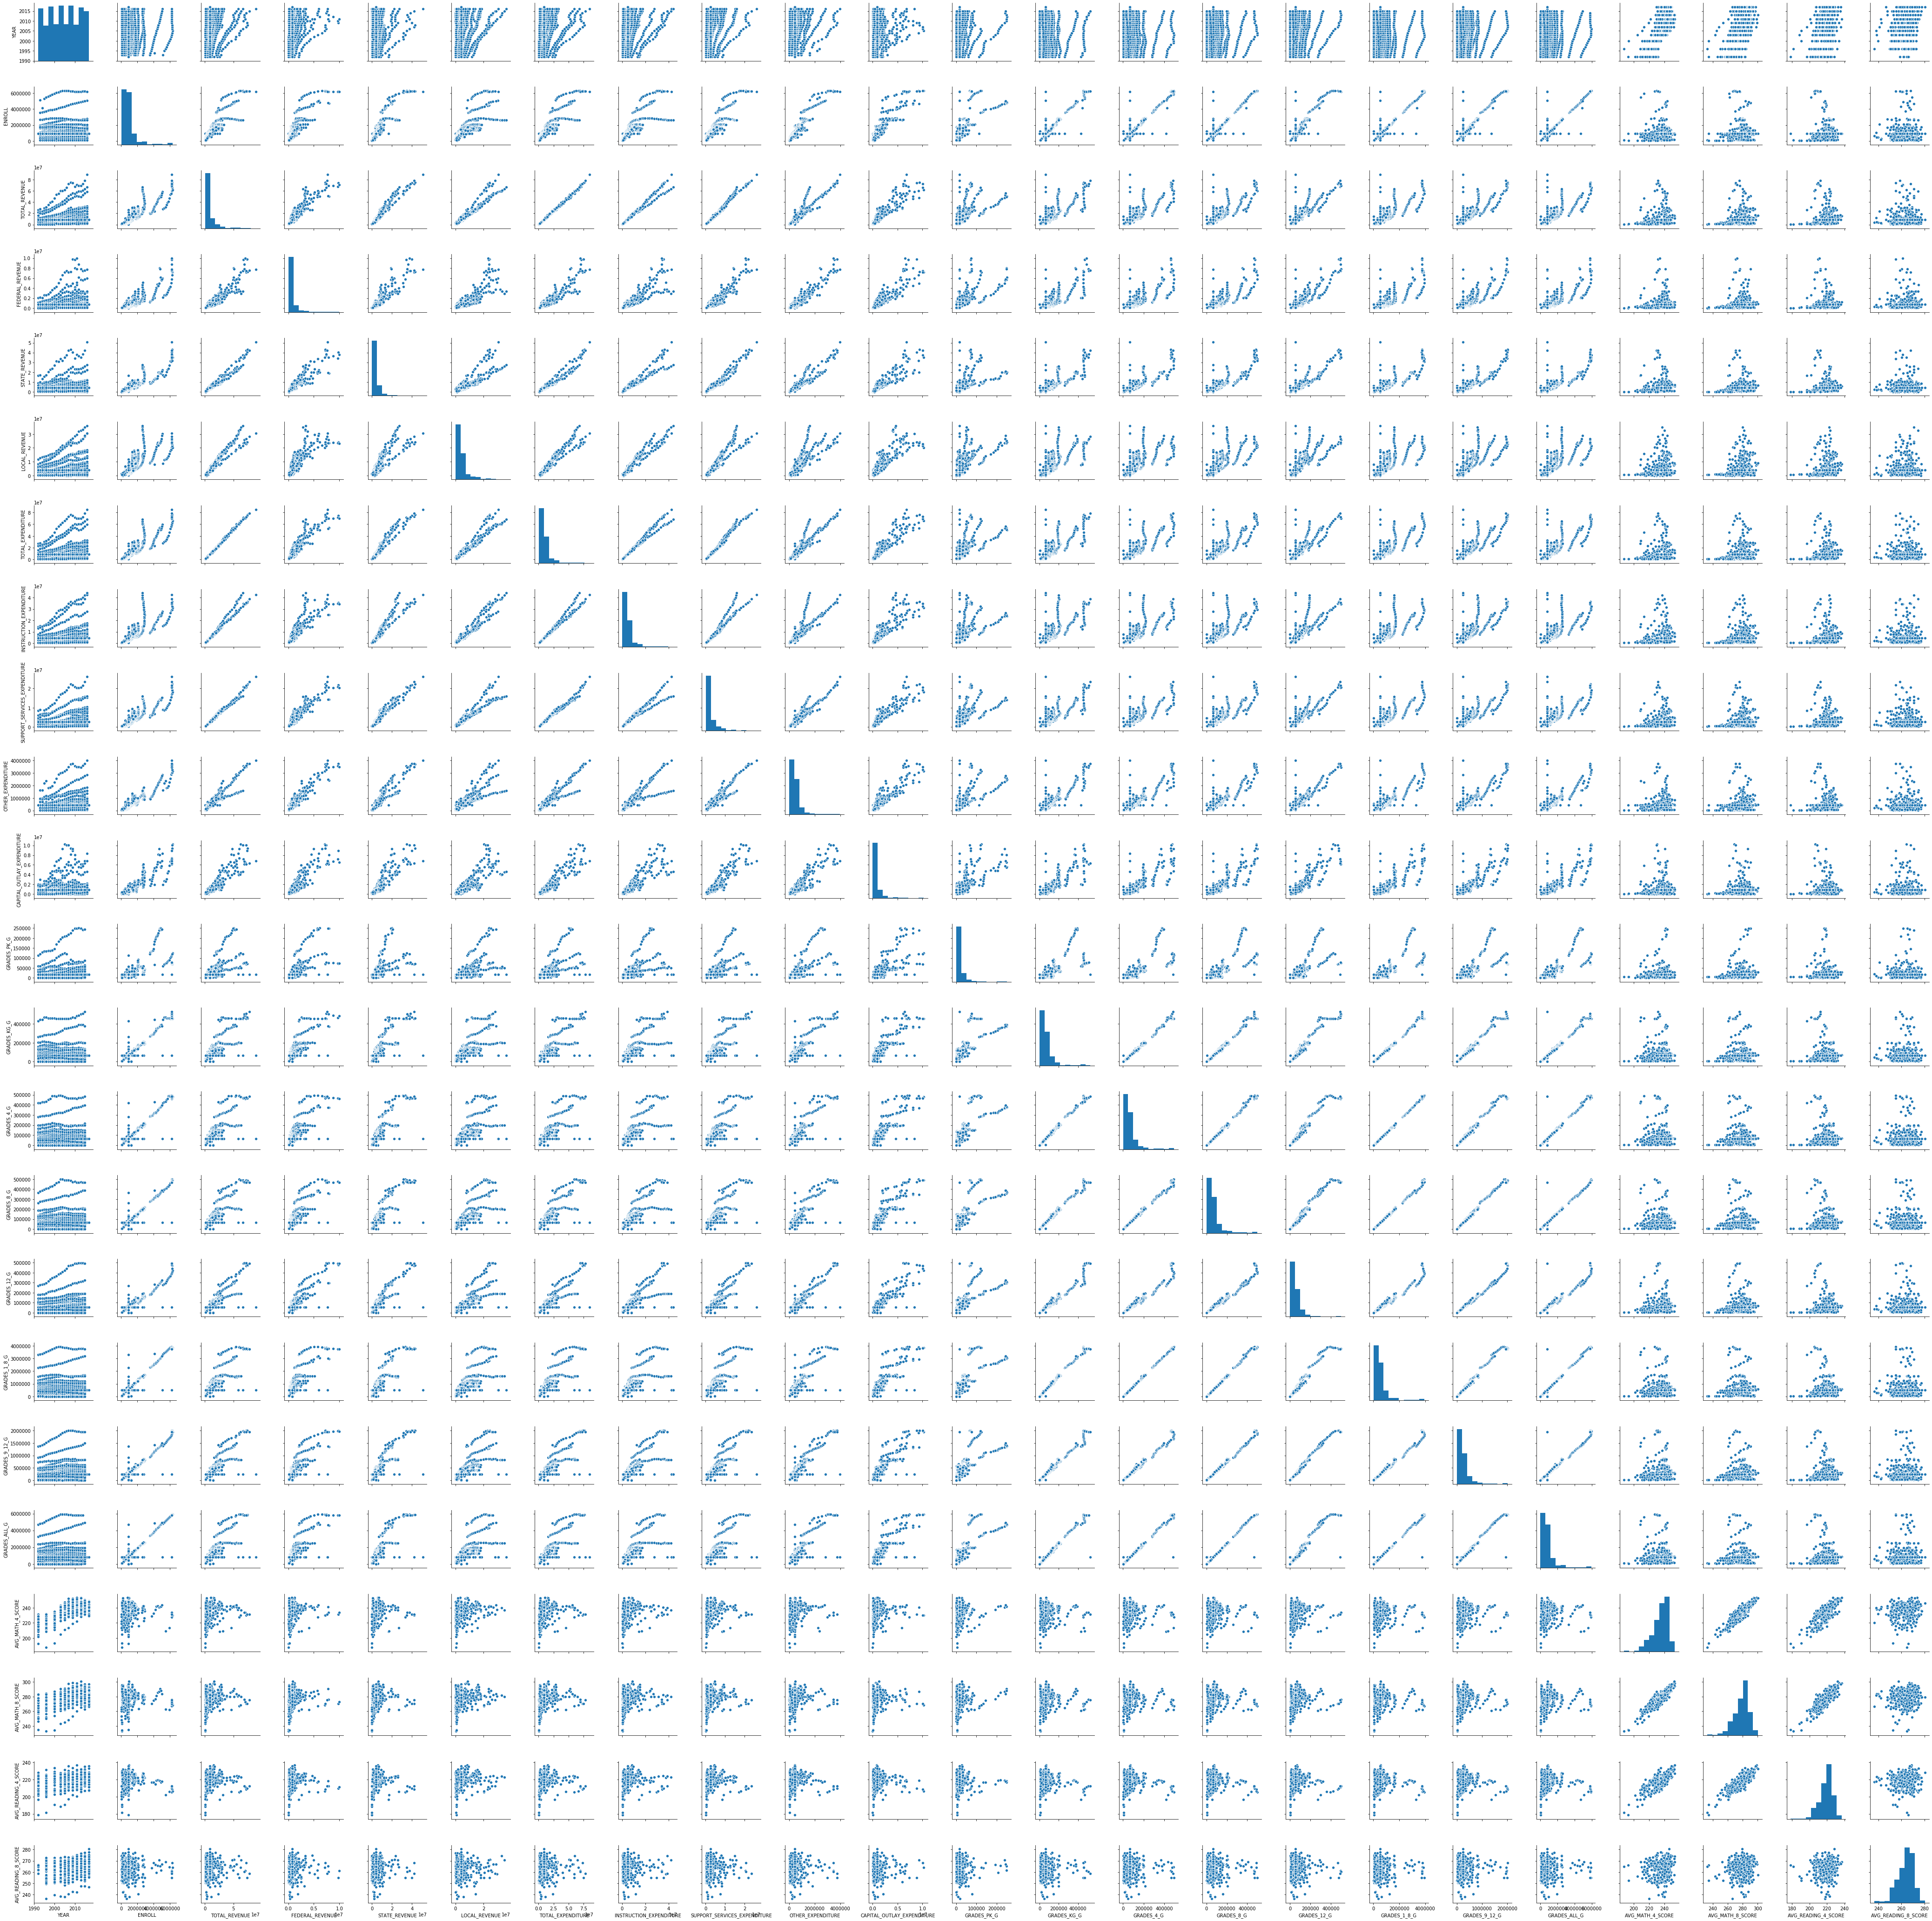

In [52]:
# note: woah... (this took forever to run (and is useless))
sns.pairplot(df2)

In [97]:
#df2

YEAR                            2.004434e+03
ENROLL                          9.159308e+05
TOTAL_REVENUE                   9.092082e+06
FEDERAL_REVENUE                 7.663723e+05
STATE_REVENUE                   4.216553e+06
LOCAL_REVENUE                   4.109157e+06
TOTAL_EXPENDITURE               9.196681e+06
INSTRUCTION_EXPENDITURE         4.762966e+06
SUPPORT_SERVICES_EXPENDITURE    2.680331e+06
OTHER_EXPENDITURE               4.292046e+05
CAPITAL_OUTLAY_EXPENDITURE      9.027693e+05
GRADES_PK_G                     1.760161e+04
GRADES_KG_G                     6.374676e+04
GRADES_4_G                      6.453893e+04
GRADES_8_G                      6.427106e+04
GRADES_12_G                     5.426892e+04
GRADES_1_8_G                    5.192140e+05
GRADES_9_12_G                   2.470714e+05
GRADES_ALL_G                    8.024415e+05
AVG_MATH_4_SCORE                2.347683e+02
AVG_MATH_8_SCORE                2.784147e+02
AVG_READING_4_SCORE             2.188662e+02
AVG_READIN

In [48]:
#df3

In [49]:
#df4